In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pf = pd.read_csv('fer2013.csv')

In [18]:
emotions, pixels, usages = pf['emotion'], pf['pixels'], pf['Usage']

In [19]:
CLASSES = emotions.unique()

In [20]:
emotions = emotions.values
pixels = pixels.values
usages = usages.values

In [22]:
emotions = np.array([int(e) for e in emotions])
pixels = np.array([np.array(p.split()).astype(int) for p in pixels])
usages = np.array([u for u in usages])

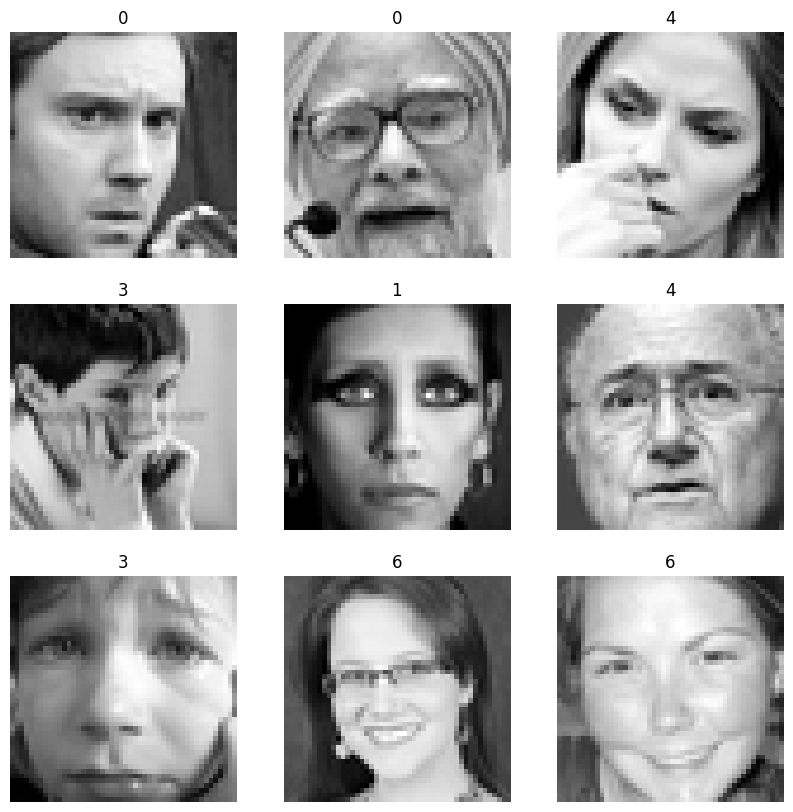

In [23]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(pixels[i]).reshape(48, 48), cmap='gray')
    plt.title(CLASSES[emotions[i]])
    plt.axis('off')
plt.show()

In [24]:
pixels.shape

(35887, 2304)

# Read all the images and convertin them to array

In [13]:
X_train = np.array(X_train).reshape(-1, image_size, image_size, 3)
y_train = np.array(y_train)
X_val = np.array(X_val).reshape(-1, image_size, image_size, 3)
y_val = np.array(y_val).astype(np.int32)
X_test = np.array(X_test).reshape(-1, image_size, image_size, 3)
y_test = np.array(y_test)
print("X_train.shape:", X_train.shape)                                                                                                               
print("y_train.shape:", y_train.shape)
print("X_val.shape:", X_val.shape)
print("y_val.shape:", y_val.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (37553, 224, 224, 3)
y_train.shape: (37553,)
X_val.shape: (800, 224, 224, 3)
y_val.shape: (800,)
X_test.shape: (3200, 224, 224, 3)
y_test.shape: (3200,)


In [14]:
X_train[0]

array([[[ 76, 127, 197],
        [ 77, 128, 198],
        [ 80, 130, 200],
        ...,
        [ 66, 127, 207],
        [ 68, 129, 209],
        [ 68, 129, 209]],

       [[ 72, 123, 193],
        [ 73, 124, 194],
        [ 76, 127, 197],
        ...,
        [ 66, 127, 207],
        [ 68, 129, 209],
        [ 68, 129, 209]],

       [[ 70, 121, 191],
        [ 71, 121, 192],
        [ 73, 124, 195],
        ...,
        [ 66, 127, 207],
        [ 67, 128, 208],
        [ 67, 128, 208]],

       ...,

       [[ 21,  19,  21],
        [ 21,  19,  21],
        [ 20,  18,  21],
        ...,
        [ 25,  22,  24],
        [ 23,  20,  22],
        [ 23,  20,  22]],

       [[ 27,  24,  26],
        [ 25,  22,  24],
        [ 23,  20,  22],
        ...,
        [ 22,  19,  21],
        [ 18,  15,  17],
        [ 17,  13,  16]],

       [[ 27,  24,  26],
        [ 25,  22,  24],
        [ 23,  20,  22],
        ...,
        [ 21,  18,  21],
        [ 16,  13,  16],
        [ 15,  12,  14]]

In [15]:
def normalize_in_batches(data, batch_size):
    normalized_data = np.zeros_like(data, dtype=np.float32)
    num_batches = len(data) // batch_size + (1 if len(data) % batch_size != 0 else 0)
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        normalized_data[start_idx:end_idx] = data[start_idx:end_idx] / 255.0
    return normalized_data

In [16]:
# X_train = X_train.astype(np.float32)
# X_val = X_val.astype(np.float32)
# X_test = X_test.astype(np.float32)
X_train = normalize_in_batches(X_train, 100)
X_val = normalize_in_batches(X_val, 100)
X_test = normalize_in_batches(X_test, 100)

In [17]:
X_train[0]

array([[[0.29803923, 0.49803922, 0.77254903],
        [0.3019608 , 0.5019608 , 0.7764706 ],
        [0.3137255 , 0.50980395, 0.78431374],
        ...,
        [0.25882354, 0.49803922, 0.8117647 ],
        [0.26666668, 0.5058824 , 0.81960785],
        [0.26666668, 0.5058824 , 0.81960785]],

       [[0.28235295, 0.48235294, 0.75686276],
        [0.28627452, 0.4862745 , 0.7607843 ],
        [0.29803923, 0.49803922, 0.77254903],
        ...,
        [0.25882354, 0.49803922, 0.8117647 ],
        [0.26666668, 0.5058824 , 0.81960785],
        [0.26666668, 0.5058824 , 0.81960785]],

       [[0.27450982, 0.4745098 , 0.7490196 ],
        [0.2784314 , 0.4745098 , 0.7529412 ],
        [0.28627452, 0.4862745 , 0.7647059 ],
        ...,
        [0.25882354, 0.49803922, 0.8117647 ],
        [0.2627451 , 0.5019608 , 0.8156863 ],
        [0.2627451 , 0.5019608 , 0.8156863 ]],

       ...,

       [[0.08235294, 0.07450981, 0.08235294],
        [0.08235294, 0.07450981, 0.08235294],
        [0.07843138, 0

# Deep learning model for training - Transfer Learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-06-28 02:09:23.005691: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 02:09:23.869657: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 02:09:25.376840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
model = tf.keras.applications.MobileNetV2()

2024-06-28 01:57:33.157735: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-28 01:57:33.258120: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
base_input = model.layers[1].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(8, activation='softmax')(final_output)

In [ ]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,728 (9.27 MB)

 Trainable params: 2,396,616 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
new_model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

In [ ]:
new_model.evaluate(X_test, y_test)

In [ ]:
y_pred = new_model.predict(X_test)

In [ ]:
y_pred[:5]

In [ ]:
# save the model
new_model.save('emotion_model.h5')